In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Assignment 3
Goals:
1. Use Monte Carlo (random numbers) to estimate the mean and error you would get for a measurement.
2. Do the same thing with the "bootstrap" method.

Both follow the same 4-5 steps outlined as follows using the same model

$$y=a + bx + \xi$$

where $a=2$, $b=1$, and $\xi$ (xi) is a random variable with mean of $0$ and standard deviation of $0.5$. We use `numpy` to generate the random numbers using `np.random.normal(loc=0, scale=0.5)`.

### 1: Monte Carlo

**(a)** Generate fake data using the equation defined above for x between 0 and 10.

a_opt = 2.43 +/- 0.56
b_opt = 0.93 +/- 0.10
Correlation Coefficient = -0.85


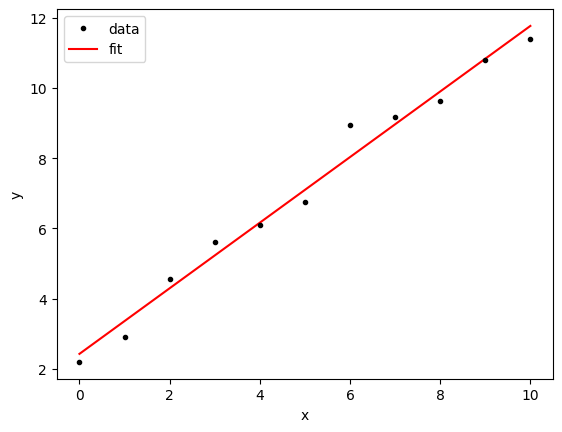

In [ ]:
# Define model
def true_model(x, a=2, b=1):
    xi = np.random.normal(0, 0.5, size = x.size)  # specifying size makes sure we get a new random number for each data point in x
    return a + b*x + xi

# Generate data
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = true_model(x)

# Do the fit
# Define fit model without the random noise - For fit only
def fit_model(x, a, b):
    return a + b*x
popt, pcov = curve_fit(fit_model, x, y, absolute_sigma=True)
error = np.sqrt(np.diag(pcov))

# Extract results from the best fit
a_opt = popt[0]
b_opt = popt[1]
a_error = error[0]
b_error = error[1]
# Code to calculate correlation coefficient from stack overflow
cov_ab = pcov[0, 1]  # Covariance between a and b
corr = cov_ab / np.sqrt((a_error**2) * (b_error**2))  # Pearson correlation coefficient

# Print results
print(f'a_opt = {a_opt:.2f} +/- {a_error:.2f}')  # I use :.2f to round to two decimal places
print(f'b_opt = {b_opt:.2f} +/- {b_error:.2f}')
print(f'Correlation Coefficient = {corr:.2f}')

# FOR FUN - NOT REQUIRED FOR ASSIGNMENT BUT HELPS UNDERSTAND
# LETS PLOT THIS
plt.plot(x, y, 'k.', label='data', zorder=10)
plt.plot(x, fit_model(x, *popt), 'r-', label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**(b)** Repeat many times and look at how the results change.

Here we want to copy the same code (without the plot), and save the outcomes to a big list so we can look at the average behaviour of many tests.

In [ ]:
Nsim = 1000  # Number of times to loop
# Save the results to these lists
a_list = []
b_list = []

for i in range(Nsim):  # Tells python to loop over a range from 0 to Nsim
    # Do the same as above
    # Generate data
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    y = true_model(x)

    # Do the fit
    popt, pcov = curve_fit(fit_model, x, y, absolute_sigma=True)
    error = np.sqrt(np.diag(pcov))

    # Extract results from the best fit
    a_opt = popt[0]
    b_opt = popt[1]
    a_error = error[0]
    b_error = error[1]
    # Code to calculate correlation coefficient from stack overflow
    cov_ab = pcov[0, 1]  # Covariance between a and b
    corr = cov_ab / np.sqrt((a_error**2) * (b_error**2))  # Pearson correlation coefficient
    
    # Save the results to the end of the list
    a_list.append(a_opt)
    b_list.append(b_opt)
print(f'Done {Nsim} fits!')

Done 1000 fits!


**(c)** Calculate and print the rusts of all these simulations averaged!
1. Mean of $a$ and $b$.
2. Standard deviation of $a$ and $b$, and standard deviation of the mean ($\sigma/\sqrt{N}$)
3. THe correlation coefficient of these lists.

In [37]:
# Get the means
mean_a_opt = np.mean(a_list)
mean_b_opt = np.mean(b_list)

# Get the standard deviations
std_a_opt = np.std(a_list)
std_b_opt = np.std(b_list)

# Get the standard deviation of the mean
stdMean_a_opt = std_a_opt/np.sqrt(Nsim)
stdMean_b_opt = std_b_opt/np.sqrt(Nsim)

# Get the correlation coefficient
corr = np.corrcoef(a_list, b_list)[0, 1]

# Print results
print(f'Results using {Nsim} random data sets:')
print(f'a_opt = {mean_a_opt:.4f} +/- {stdMean_a_opt:.4f} (std = {std_a_opt:.3f})')  # I use :.2f to round to two decimal places
print(f'b_opt = {mean_b_opt:.4f} +/- {stdMean_b_opt:.4f} (std = {std_b_opt:.3f})')
print(f'Correlation Coefficient = {corr:.2f}')

Results using 1000 random data sets:
a_opt = 1.9964 +/- 0.0087 (std = 0.276)
b_opt = 1.0013 +/- 0.0014 (std = 0.045)
Correlation Coefficient = -0.82


The equation is defined with $a=1$ and $b=2$, we see that the results match much closer to the true value with very small errors. The results are still within one standard deviation of the mean from the true values. The standard deviation and correlation is consistent with out first fit. 

**(d)** Make a scatter plot of the list of fit results. Add marginal histograms.

While I would love to code this up myself, I think that would be confusing. Lets copy the code he shared: https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_hist.html

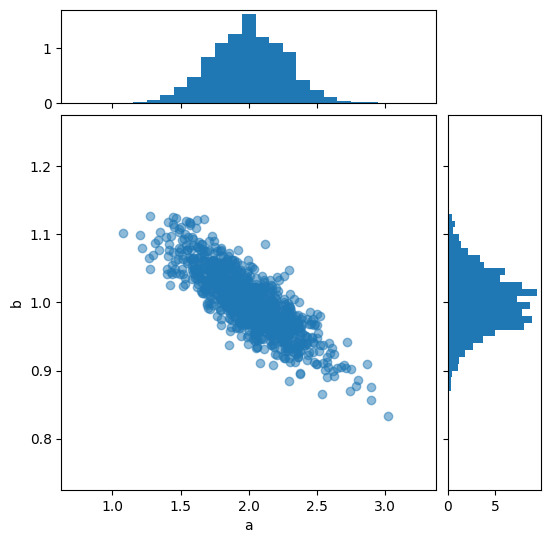

In [ ]:
# COPIED CODE HERE %---------------------------------------------------%
def scatter_hist(x, y, ax, ax_histx, ax_histy, xbinwidth, xlim, ybinwidth, ylim): # Edited to add binwidth, xlim, ylim as arguments
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y, alpha= 0.5)                                 # Edited to add alpha=0.5 for transparency

    # Histogram X with custom limits
    bins_x = np.arange(xlim[0], xlim[1] + xbinwidth, xbinwidth)  # Edited custom bins
    ax_histx.hist(x, bins=bins_x, density=True)                  # Edited to add density=true
    
    # Histogram Y with custom limits
    bins_y = np.arange(ylim[0], ylim[1] + ybinwidth, ybinwidth)  # Edited custom bins
    ax_histy.hist(y, bins=bins_y, orientation='horizontal', density=True) # Edited to add density=true


# Changed this code tp use out x and y data
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# END COPIED CODE HERE %-----------------------------------------------%

xbinwidth = 0.1
ybinwidth = 0.01
xlim = (0.75, 3.25)
ylim = (0.75, 3.25)
scatter_hist(a_list, b_list, ax, ax_histx, ax_histy, xbinwidth, xlim, ybinwidth, ylim)    # EDIT THIS x and y become a_list and b_list
ax.set(xlabel='a', ylabel='b')

plt.show()

Shape matches the correlation we got as we see that when a is larger, b is smaller and vice-versa. Also the error on b is smaller than a. Each individual histogram shows that a and b individually follow a gaussian.

The question states we do not need to make it into a density plot.

## 2: Bootstrap Estimation

I am not familiar with this method so there will be fewer comments! This question uses the exact same underlying `true_model` as the first part.

**(a)** Generate 20 data points

In [89]:
# Generate data
x_boot = np.arange(0, 20)  # This makes a list of numbers from 0 to 19
y_boot = true_model(x, a=2, b=1)

**(b)** Fit the data with our `fit_model` assuming an error of $\sigma=0.5$. We are going to compare this result to the bootstrap method.

In [90]:
# do curve fit
popt, pcov = curve_fit(fit_model, x_boot, y_boot, sigma=0.5, absolute_sigma=True)
error = np.sqrt(np.diag(pcov))

# Extract fit results and print
a_opt = popt[0]
b_opt = popt[1]
a_error = error[0]
b_error = error[1]
print(f'a_opt = {a_opt:.2f} +/- {a_error:.2f}')  # I use :.2f to round to two decimal places
print(f'b_opt = {b_opt:.2f} +/- {b_error:.2f}')

a_opt = 1.99 +/- 0.22
b_opt = 1.01 +/- 0.02


**(c)** Do the bootstrap method defined as:
1. Create a fake data set by randomly picking values from our data.
2. Fit this fake data set.
3. Repeat this and save the fit results to a list. We then take the mean and std again.

In [91]:
Nbootstrap = 1000
# Save the results to these lists
a_list_bootstrap = []
b_list_bootstrap = []

# Repeat for many times
for i in range(Nbootstrap):
    # STEP 1: Randomly reselect data points
    random_index = np.random.choice(20, 20, replace=True)
    x_new = x_boot[random_index]
    y_new = y_boot[random_index]
    
    # STEP 2: Fit this fake data
    popt, pcov = curve_fit(fit_model, x_new, y_new, sigma=0.5, absolute_sigma=True)
    error = np.sqrt(np.diag(pcov))
    # Extract fit results and print
    a_opt = popt[0]
    b_opt = popt[1]
    
    # STEP 3: Save these results then repeat
    a_list_bootstrap.append(a_opt)
    b_list_bootstrap.append(b_opt)

# Finally, get the statistics. He specifies cumulative statistics. I made these up, you can ask me to explain, or say chat gpt made them.
def cum_mean(data):
    L = len(data)
    return np.cumsum(data) / np.arange(1, L + 1)
def cum_std(data):
    L = len(data)
    result = [np.std(data[:i+1]) for i in range(L) ]
    return np.array(result)
    
cummean_a = cum_mean(a_list_bootstrap)
cumstd_a = cum_std(a_list_bootstrap)
cummean_b = cum_mean(b_list_bootstrap)
cumstd_b = cum_std(b_list_bootstrap)

**(d)** Plot the results. **I am guessing this as I dont have access to the 'set of four subplots from analysis lecture 3'**.

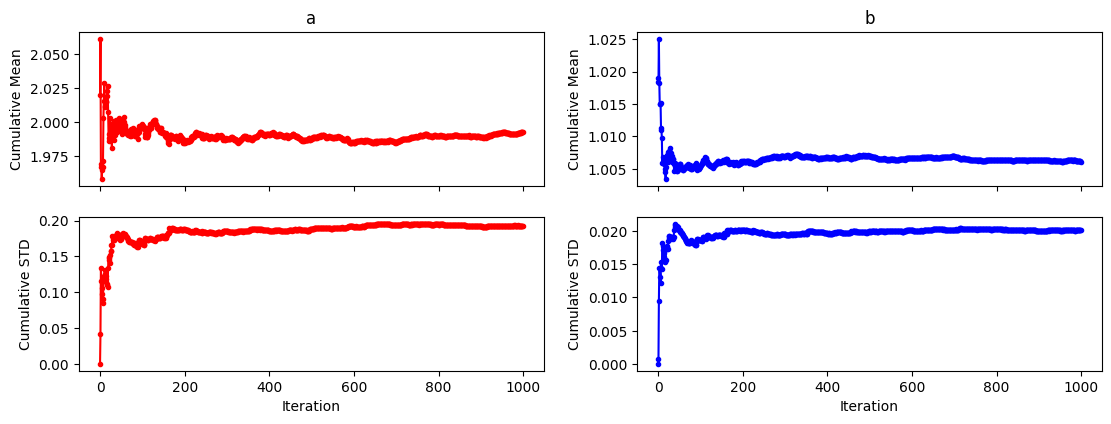

In [92]:
# Make a set of four subplots
fig, axs = plt.subplots(2, 2, figsize = np.array([3.3*2, 2.2])*2, sharex=True)
ax_a_mean = axs[0, 0]
ax_a_std = axs[1, 0]
ax_b_mean = axs[0, 1]
ax_b_std = axs[1, 1]

# Plot for a
ax_a_mean.plot(cummean_a, 'r.-')
ax_a_std.plot(cumstd_a, 'r.-')
# Format labels
ax_a_mean.set(title='a', ylabel='Cumulative Mean')
ax_a_std.set(xlabel='Iteration', ylabel='Cumulative STD')

# Plot for b
ax_b_mean.plot(cummean_b, 'b.-')
ax_b_std.plot(cumstd_b, 'b.-')
# Format labels
ax_b_mean.set(title='b', ylabel='Cumulative Mean')
ax_b_std.set(xlabel='Iteration', ylabel='Cumulative STD')

plt.show()

**(e)** Compare the final iteration (all 1000 simulations) to the ideal case.

In [94]:
print(f'a_final = {cummean_a[-1]:.4f} +/- {cumstd_a[-1]:.4f}')
print(f'b_final = {cummean_b[-1]:.4f} +/- {cumstd_b[-1]:.4f}')

a_final = 1.9930 +/- 0.1926
b_final = 1.0061 +/- 0.0201


We see that these match very well to the known $a=2$ and $b=1$ with errors similar to what we found for a single curve fit in (b). This means that even if we have a single data set without well known errors, we can simulate what the error on the data should be.